# Augmentation examples

In this notebook, we show some examples of the data augmentation techniques used in our paper.
Implementation of the individual techniques is in `synthesis.py` file.

In [1]:
from dataset import GDSDataset, Sample, samples_to_np
from synthesis import DataFactory
import matplotlib.pyplot as plt
import numpy as np

from utils import plot_traj, plot_trajs

In [2]:
ds = GDSDataset("./", sub_idx=1)
print(ds)

Loading dataset from ./xml_logs
Dataset: gds
Subjects: 1
Gesture types: 16
Samples: 480


### Test plotting original samples

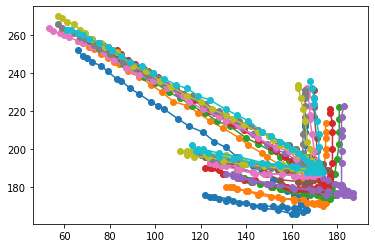

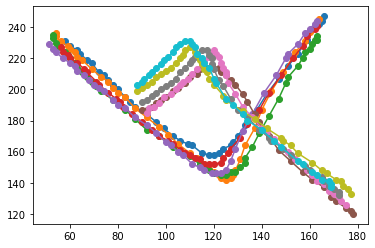

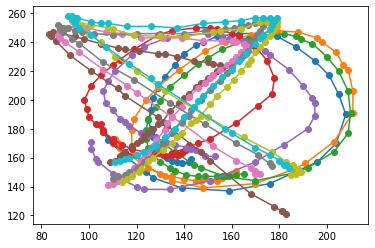

In [3]:
# test plot list of samples
plot_trajs(ds.samples[:10])

# test plot list of tuples
plot_trajs(samples_to_np(ds.samples[15:25]))

# test plot list of np.ndarray
plot_trajs([s.trajectory for s in ds.samples[35:45]])

### Test generation

In [4]:
# get a single instance of each gesture type
subset_idxs = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150]
sample_subset = [ds.samples[i] for i in subset_idxs]

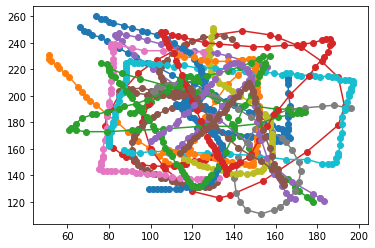

In [5]:
# plot them
plot_trajs(sample_subset)

Now, let's generate some samples using the techniques implemented in `synthesis.py` file.    
We will use the `DataFactory.generate_chain()` function that takes in samples and a list of augmentation techniques that will be applied one after another. The list of available techniques is:
`gaussian`, `uniform`, `rotate`, `perspective`, `scale`, `shear`, `spatial`, `temporal`, `duplicate`, `frame-skip`, `frame-jitter`, `bezier`.
We also need to pass the target number of samples to generate per original input sample.

In [6]:
# convert samples to the correct format: Union[List[Sample], List[Tuple[np.ndarray, Union[str, int]]]]
samples_subset = samples_to_np(sample_subset)

In [7]:
# synthesize samples using a few different methods chained together
synth = DataFactory.generate_chain(sample_subset, ["rotate", "scale", "shear"], n=12)

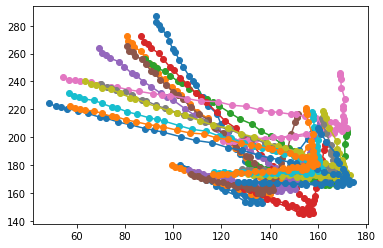

In [8]:
# plot only the arrows
arrows = [s[0] for s in synth if s[1] == "arrow"]
plot_trajs(arrows)

In [9]:
# then, synthesize new samples using a long chain of random transformations
synth = DataFactory.generate_chain(sample_subset,
    ["frame-jitter", "frame-skip", "duplicate", "scale", "temporal", "rotate", "shear", "perspective"],
    n=12)

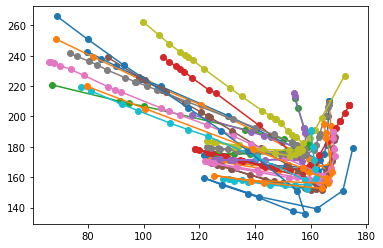

In [10]:
# plot only the arrows
arrows = [s[0] for s in synth if s[1] == "arrow"]
plot_trajs(arrows)

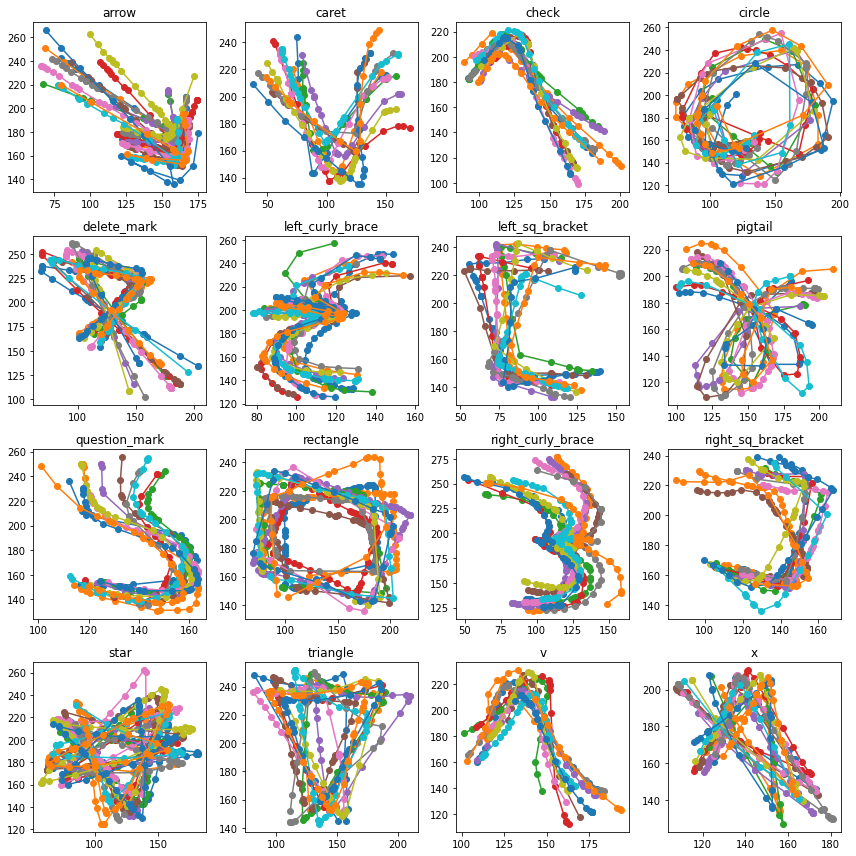

In [11]:
# sort synthetics by gesture type
synth_per_category = {k: [] for k in ds.gnames}
for s in synth:
    synth_per_category[s[1]].append(s[0])

# plot all synthetics gestures
fig, ax = plt.subplots(4, 4, figsize=(12, 12))
for i, (gname, trajs) in enumerate(synth_per_category.items()):
    ax[i // 4, i % 4].set_title(gname)
    for traj in trajs:
        ax[i // 4, i % 4].plot(traj[:, 0], traj[:, 1], 'o-')

# set white background
fig.patch.set_facecolor('white')

fig.tight_layout()

### Using pre-defined augmentation chains

Pre-defined augmentation chains include: `avc` and `simple`. For details, refer to actual implementation and to the paper. 

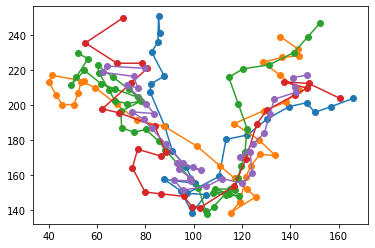

In [12]:
# apply AVC chain to all gestures, then visualize only carets
synth = DataFactory.generate_avc(sample_subset, n=5)
carets = [s[0] for s in synth if s[1] == "caret"]
plot_trajs(carets)

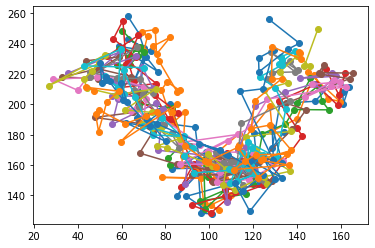

In [13]:
# apply Simple chain
synth = DataFactory.generate_simple(sample_subset, n=12)
carets = [s[0] for s in synth if s[1] == "caret"]
plot_trajs(carets)

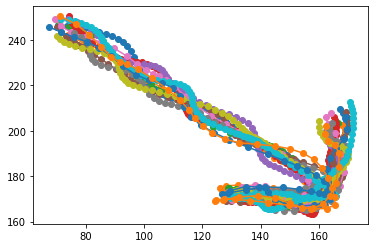

In [14]:
# apply "bezier deformation using b-splines"
synth = DataFactory.generate_chain(sample_subset, ["bezier"], n=12)
arrows = [s[0] for s in synth if s[1] == "arrow"]
plot_trajs(arrows)